# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Functions

In [2]:
# function scale data within experiment to IL-6 10 ng/ml at 20 mins
# inputs: data_df = traj. dataframe to scale (samples x time points), n = number of stimulation conditions 
# outputs: scaled_data_df = scaled dataframe of same dimensions
def scale(data_df,n=6):
    # place to store scaled data
    scaled_data_df = data_df.copy()

    # get start indices per experiment
    start_ind = np.arange(0,len(data_df),n)

    # loop through to scale data in chunks
    for i in start_ind:
        # scale to IL-6 10 ng/ml at 20 mins and save data 
        scaled_data_df.iloc[i:i+n,:] = data_df.iloc[i:i+n,:] / data_df.iloc[i+1,20]
    
    return scaled_data_df

In [3]:
# function to plot trajectories
# input: data_df = traj data df samples x timepoints, param_sets_df = data frame of parameter sets samples x parameters, 
# il6_conc = list of strings for IL-6 stim, il10_conc = list of strings for IL-6 stim, 
# c = list of strings for plot color, measure = string of STAT (e.g., pSTAT3), 
# figscale = scale y-axis automatically or set limits (default autoscale)
# output: just images, no data
def plot_trajs(data_df,param_sets_df,il6_conc,il10_conc,c,measure,figscale='auto',save=False):
    plt.figure(facecolor='w')
    
    # go through each stim
    for i in range(len(il6_conc)):
        # get samples with the concentrations of interest
        ind = np.where((param_sets_df['L1_0'] == il6_conc[i]) & (param_sets_df['L2_0'] == il10_conc[i]))[0]

        # get relevant trajs from dataset
        trajs_df = data_df.iloc[ind,:]

        # plot trajs
        for j in range(len(trajs_df)):
            plt.plot(trajs_df.iloc[j,:], color = c[i], alpha = 0.05)
    
    plt.xlabel('Time (mins)')
    plt.ylabel(measure)

    # scale figure if needed
    if figscale != 'auto':
        plt.ylim(figscale)

    plt.show()

# Main Script

In [8]:
# load sample data to analyze
# load trajectory data (samples x timepoints in minutes)
pstat3_il6_trajs_df = pd.read_csv('Data/BNGL_pSTAT_simulations/pSTAT3_trajs.csv',header=None)
pstat1_il6_trajs_df = pd.read_csv('Data/BNGL_pSTAT_simulations//pSTAT1_trajs.csv',header=None)

# load parameter sets
param_sets_df = pd.read_csv('Data/BNGL_pSTAT_simulations//param_sets.csv')

# scale data to IL-6 10 ng/ml 20 minute time point
scaled_pstat3_trajs_df = scale(pstat3_il6_trajs_df)
scaled_pstat1_trajs_df = scale(pstat1_il6_trajs_df)
scaled_pstat1_trajs_df.to_csv("pStat_check.csv")

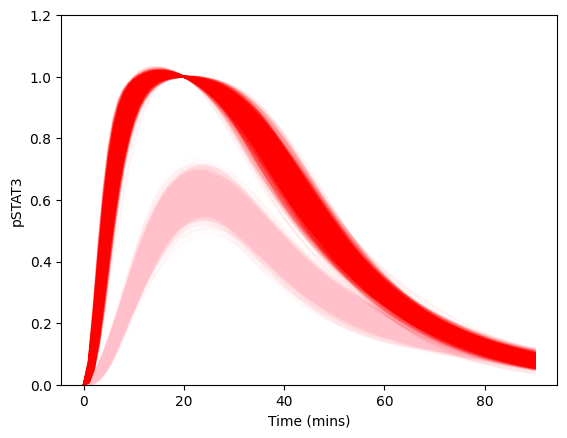

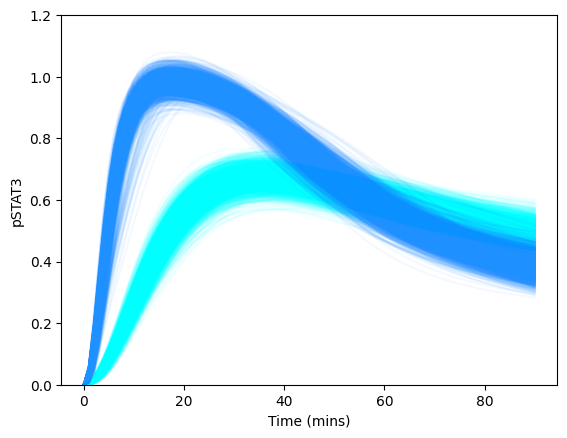

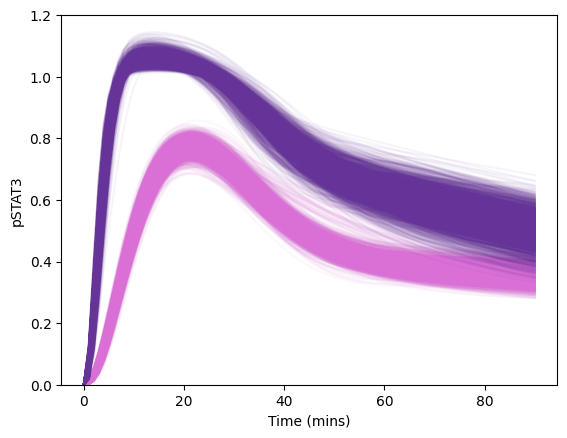

In [5]:
# pSTAT3 plots 
# plot IL-6 conditions 
plot_trajs(scaled_pstat3_trajs_df, param_sets_df, [1,10], [0,0], ['pink','red'], 'pSTAT3', figscale=[0,1.2])

# plot IL-10 conditions 
plot_trajs(scaled_pstat3_trajs_df, param_sets_df, [0,0], [1,10], ['cyan','dodgerblue'], 'pSTAT3', figscale=[0,1.2])

# plot combo conditions 
plot_trajs(scaled_pstat3_trajs_df, param_sets_df, [1,10], [1,10], ['orchid','rebeccapurple'], 'pSTAT3', figscale=[0,1.2])

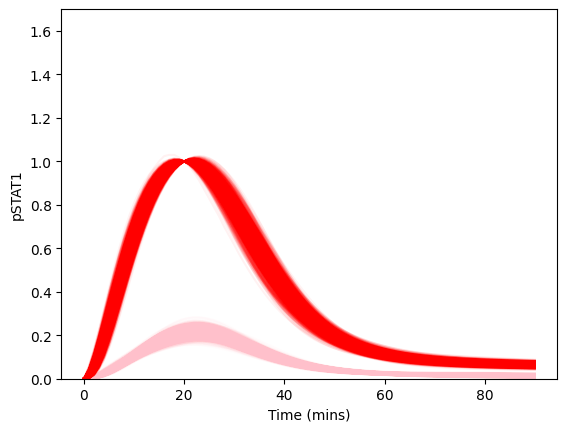

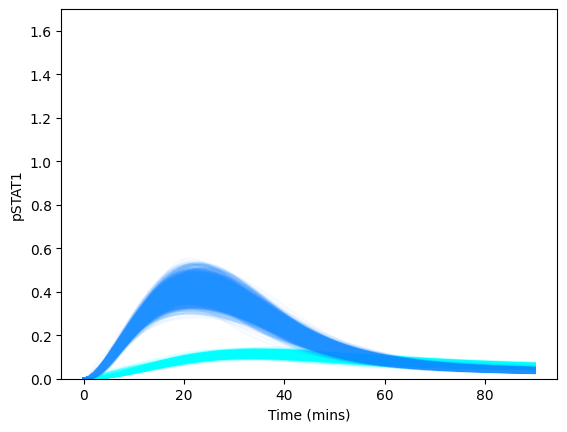

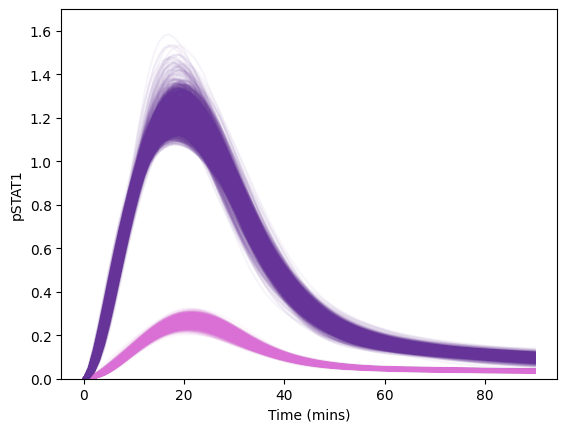

In [6]:
# pSTAT1 plots 
# plot IL-6 conditions 
plot_trajs(scaled_pstat1_trajs_df, param_sets_df, [1,10], [0,0], ['pink','red'], 'pSTAT1', figscale=[0,1.7])

# plot IL-10 conditions 
plot_trajs(scaled_pstat1_trajs_df, param_sets_df, [0,0], [1,10], ['cyan','dodgerblue'], 'pSTAT1', figscale=[0,1.7])

# plot combo conditions 
plot_trajs(scaled_pstat1_trajs_df, param_sets_df, [1,10], [1,10], ['orchid','rebeccapurple'], 'pSTAT1', figscale=[0,1.7])